<a href="https://colab.research.google.com/github/shayesteh73/shayesteh73/blob/main/Stock_market_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 Stock market prediction using the LSTM deep learning algorithm and applying simple and exponential moving average indicators on market data.

In [ ]:
import math
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import yfinance as yfin
yfin.pdr_override()
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


Extracting NVDA dataset from yahoo online and preprocessing the dataset.


# Dataset Generating


In [ ]:
data = pdr.get_data_yahoo('NVDA' , start='2012-12-12', end='2023-04-12')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-12-12    3.172500    3.190000    3.117500    3.130000    2.889815   
2012-12-13    3.125000    3.192500    3.102500    3.132500    2.892123   
2012-12-14    3.145000    3.180000    3.122500    3.147500    2.905972   
2012-12-17    3.140000    3.157500    3.087500    3.135000    2.894431   
2012-12-18    3.135000    3.175000    3.125000    3.140000    2.899048   
...                ...         ...         ...         ...         ...   
2023-04-04  279.660004  280.000000  273.070007  274.529999  274.454834   
2023-04-05  268.290009  269.980011  263.950012  268.809998  268.736450   
2023-04-06  265.839996  270.799988  264.269989  270.369995  270.295959   
2023-04-10  268.230011  276.209991  266.690002  275.790009  275.714508   
2023-04-11  277.239990  277.899994  271.260010  271.690002  271.615631   

              Volume  
Date          

In [ ]:
df=data

In [ ]:
df.shape

(2599, 6)

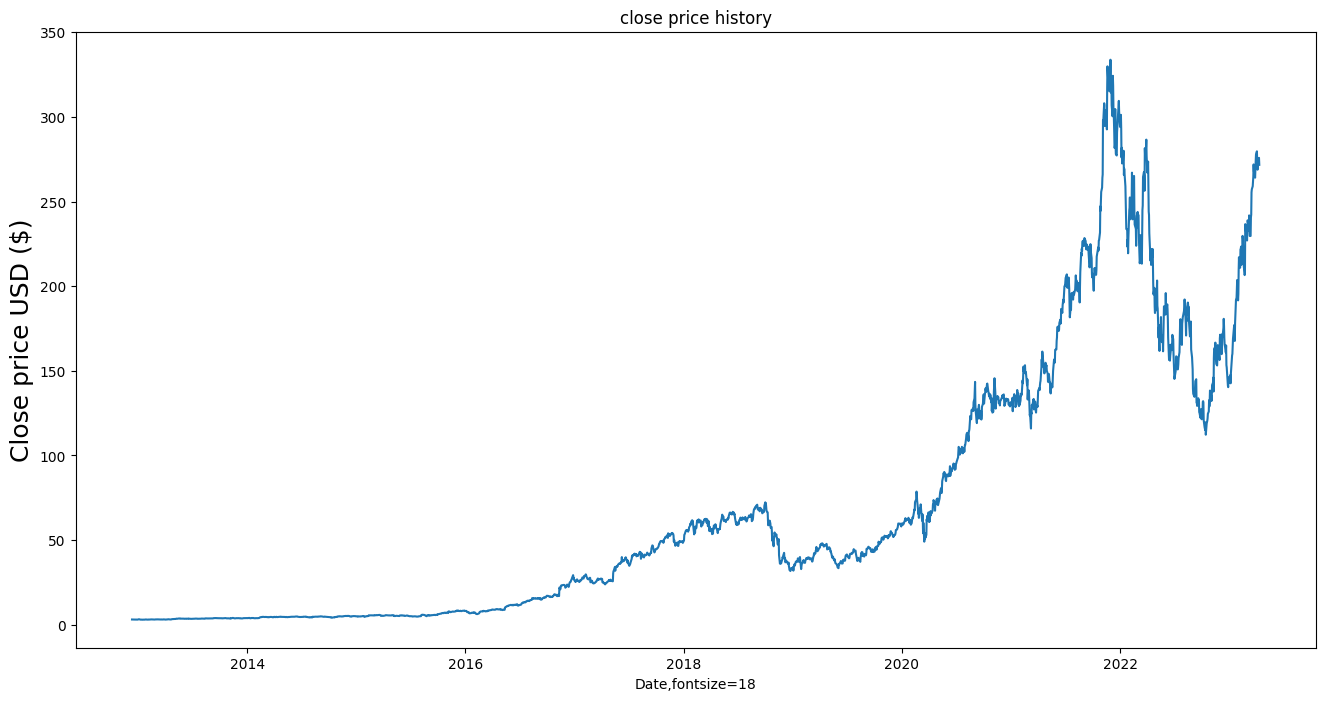

In [ ]:
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date,fontsize=18')
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [ ]:
# creat the 'Close Cloumn'

data=df.filter(['Close'])

In [ ]:
# convert to numpy

dataset=data.values

In [ ]:
# the number of rows to be trained

training_data_len= math.ceil(len(dataset)*.8)
training_data_len


2080

In [ ]:
# scale the data

scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)
scaled_data

array([[4.08145435e-04],
       [4.15703123e-04],
       [4.61052856e-04],
       ...,
       [8.08353324e-01],
       [8.24739620e-01],
       [8.12344095e-01]])

In [ ]:
# creat scaled data for training

train_data=scaled_data[0:training_data_len,:]

In [ ]:
# split data to x_train , x_test

x_train=[]
y_train=[]

In [ ]:
for i in range (50,len(train_data)):
  x_train.append(train_data[i-50:i,0])
  y_train.append(train_data[i,0])
  if i<=50:
    print(x_train)
    print(y_train)
    print()

[array([4.08145435e-04, 4.15703123e-04, 4.61052856e-04, 4.23261532e-04,
       4.38378350e-04, 5.06401869e-04, 4.98844180e-04, 2.79655366e-04,
       2.04072718e-04, 1.96514309e-04, 1.36048478e-04, 9.06994661e-05,
       2.11631127e-04, 5.59310011e-04, 5.66867699e-04, 8.84313668e-04,
       5.97101335e-04, 3.85470208e-04, 1.73839802e-04, 1.88955900e-04,
       1.73839802e-04, 1.66281393e-04, 0.00000000e+00, 8.31410571e-05,
       2.04072718e-04, 1.43606887e-04, 9.82571543e-05, 1.13373972e-04,
       1.58722985e-04, 3.25004378e-04, 4.76168954e-04, 2.72096957e-04,
       2.56980139e-04, 2.11631127e-04, 2.94771463e-04, 1.36048478e-04,
       3.47678884e-04, 2.72096957e-04, 2.34305633e-04, 2.94771463e-04,
       4.00587026e-04, 3.40121196e-04, 2.94771463e-04, 5.66867699e-04,
       5.66867699e-04, 4.38378350e-04, 3.02329872e-04, 2.34305633e-04,
       4.08145435e-04, 2.41864042e-04])]
[0.000294771462876443]



In [ ]:
# convert the x_train , y_train to numpy arrays

x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
# Reshape the data

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

(2030, 50, 1)

In [ ]:
# Build the LSTM model

model=Sequential()
model.add(LSTM(40, return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(30))
model.add(Dense(1))

In [ ]:
# Compile the Model

model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Train the Model

model.fit(x_train,y_train,batch_size=1,epochs=1)

2030/2030 [==============================] - 29s 13ms/step - loss: 3.6765e-04


In [ ]:
test_data=scaled_data[training_data_len-50:,:]
print(len(test_data))
x_test=[]
y_test=dataset[training_data_len:,:]
print (len(test_data))
for i in range (50,len(test_data)):
  x_test.append(test_data[i-50:i,0])

569
569


In [ ]:
# Convert x_test to numpy arrays

x_test=np.array(x_test)


In [ ]:
# Reshape x_test

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# prediction

predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions)



17/17 [==============================] - 1s 6ms/step


In [ ]:
# The root mean squared error

rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.044042877608870726

<ipython-input-25-fcb641488786>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


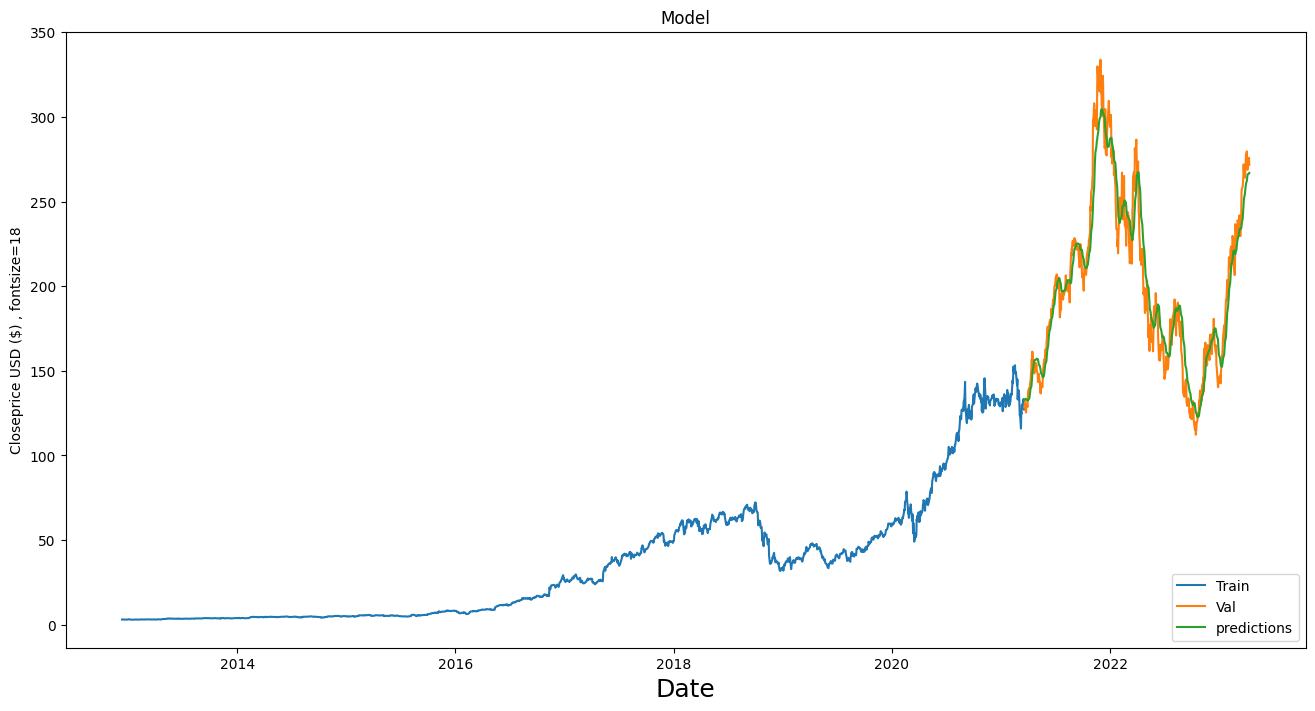

[[133.0554  ]
 [133.0981  ]
 [133.33124 ]
 [133.54065 ]
 [133.36577 ]
 [132.918   ]
 [132.61356 ]
 [132.49219 ]
 [132.41336 ]
 [132.76622 ]
 [133.69962 ]
 [135.00899 ]
 [136.30891 ]
 [137.74078 ]
 [139.26572 ]
 [140.78384 ]
 [142.85307 ]
 [145.4232  ]
 [147.70715 ]
 [150.3897  ]
 [152.85156 ]
 [154.54431 ]
 [155.54749 ]
 [156.26437 ]
 [156.33527 ]
 [156.42415 ]
 [156.67981 ]
 [156.92    ]
 [157.05208 ]
 [157.1619  ]
 [156.98589 ]
 [156.53893 ]
 [155.5812  ]
 [154.53432 ]
 [153.5724  ]
 [152.97452 ]
 [152.15224 ]
 [151.33086 ]
 [150.11227 ]
 [148.71783 ]
 [147.82538 ]
 [147.18803 ]
 [146.61783 ]
 [146.17618 ]
 [146.29472 ]
 [147.00452 ]
 [148.48459 ]
 [150.27026 ]
 [152.1201  ]
 [153.67413 ]
 [155.58394 ]
 [157.51762 ]
 [159.73874 ]
 [162.07492 ]
 [164.78625 ]
 [167.48798 ]
 [169.82811 ]
 [171.70793 ]
 [173.24811 ]
 [174.81375 ]
 [176.4111  ]
 [177.69685 ]
 [178.74272 ]
 [180.28362 ]
 [181.90955 ]
 [183.27556 ]
 [184.78647 ]
 [186.37111 ]
 [187.9819  ]
 [189.3227  ]
 [191.21404 ]
 [193.

In [ ]:
# Plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closeprice USD ($) , fontsize=18')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'], loc='lower right')
plt.show()
print(predictions)

In [ ]:
nvda = pdr.get_data_yahoo('NVDA', start='2012-12-12', end='2023-04-12')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Create a new data frame

new_df=nvda.filter(['Close'])

In [ ]:
# Get the last 50 day closing price values and convert the dataframe to an array
last_50_days=new_df[-50:].values

In [ ]:
# Scale the data to be values between 0 and 1

last_50_days_scaled=scalar.transform(last_50_days)

In [ ]:
# Creat an empty list

X_test=[]
X_test.append(last_50_days_scaled)

In [ ]:
# Convert the numpy array

X_test=np.array(X_test)

In [ ]:
# Reshape the data

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
pred_price=model.predict(X_test)

1/1 [==============================] - 0s 16ms/step


In [ ]:
# Get the predicted scalar price

pred_price=scalar.inverse_transform(pred_price)
print(pred_price)

[[267.1321]]


In [ ]:
nvda_2= pdr.get_data_yahoo('NVDA', start='2023-04-12', end='2023-04-20')
print(nvda_2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2023-04-12    264.950012
2023-04-13    264.630005
2023-04-14    267.579987
2023-04-17    270.019989
2023-04-18    276.670013
2023-04-19    279.309998
Name: Close, dtype: float64


In [ ]:
# Creat a function for calculation Moving Avarege (MA)

def MA(data,period=30,column='Close'):
  return data[column].rolling(window=period).mean()

In [ ]:
# Creat a function for calculation Exponential Moving Average(EMA)

def EMA(data,period=30,column='Close'):
  return data[column].ewm(span=period).mean()

In [ ]:
# Create two new columns for storing the 20 day and 50 day MA

df['MA20']=MA(df,20)
df['MA50']=MA(df,50)

In [ ]:
# Create two new columns for storing the 20 day and 50 day EMA

df['EMA20']=EMA(df,20)
df['EMA50']=EMA(df,50)

In [ ]:
# Get the buy and sell signals

df['Signal']=np.where(df['EMA20']>df['EMA50'],1,0)
df['position']=df['Signal'].diff()

In [ ]:
df['buy']=np.where(df['position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['position']==-1, df['Close'], np.NAN)

In [ ]:
df['signal']=np.where(df['EMA20']>df['EMA50'],1,0)
df['position']=df['Signal'].diff()

In [ ]:
# Get the buy and sell signals

df['Buy']=np.where(df['position']==1, df['Close'], np.NAN)
df['Sell']=np.where(df['position']==-1, df['Close'], np.NAN)

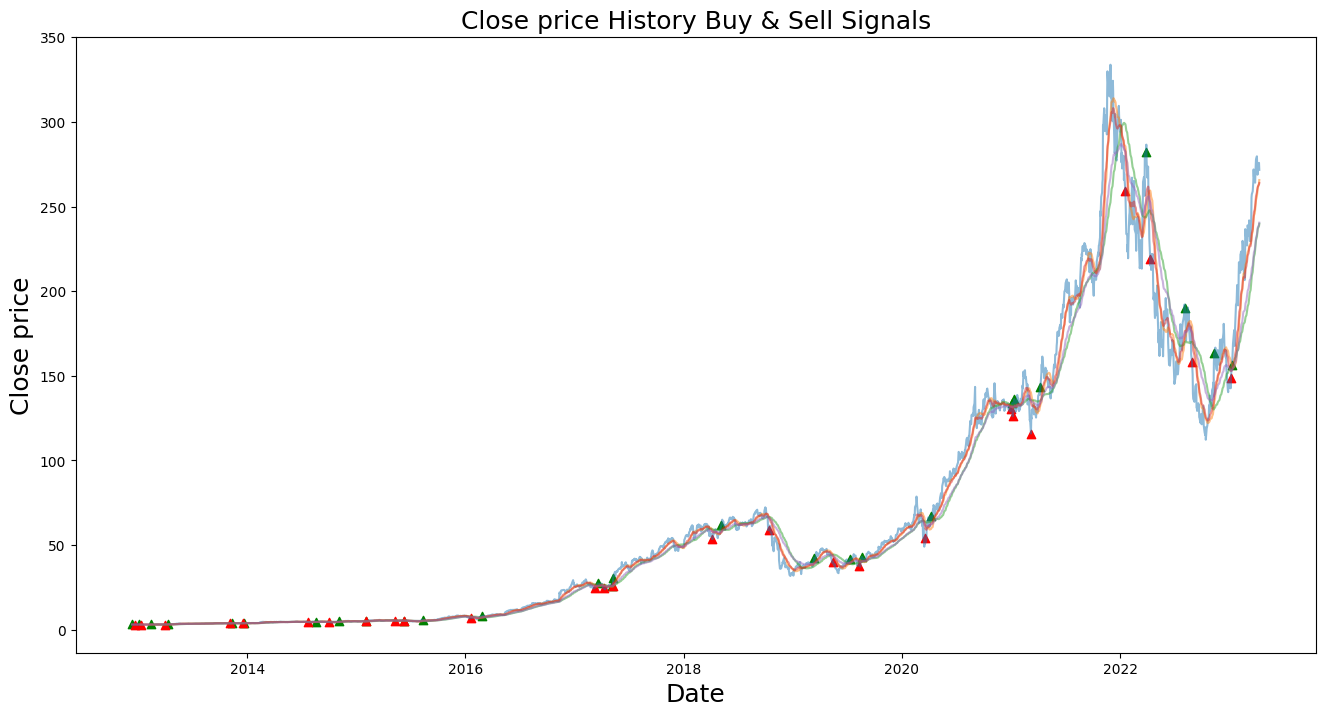

In [ ]:
# Show the Close price with the WMA,EMA and Buy and Sell signals
plt.figure(figsize=(16,8))
plt.title('Close price History Buy & Sell Signals' , fontsize=18)
plt.plot(df['Close'],  alpha=0.5 , label='Close')
plt.plot(df['MA20'], alpha=0.5 , label='MA20')
plt.plot(df['MA50'], alpha=0.5 , label='MA50')
plt.plot(df['EMA20'], alpha=0.5 , label='EMA20')
plt.plot(df['EMA50'], alpha=0.5 ,label='EMA50')


plt.scatter(df.index,df['Buy'], alpha=1, label='Buy Signal', marker='^',color='green')

plt.scatter(df.index,df['Sell'], alpha=1, label='Sell Signal', marker='^',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price',fontsize=18)
plt.show()







